In [1]:
from tools import *
from omegaconf import OmegaConf
from models._main import get_model
from models._utils import print_parameters

sns.set_style("whitegrid")

CUDA device found.


# Color and Marker code

*Returns the legend code that is used across all plots.*

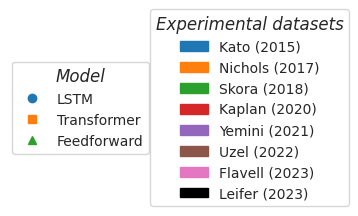

In [2]:
leg_code = legend_code()

In [5]:
leg_code["ds_color_code"]

{'Kato': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Nichols': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Skora': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'Kaplan': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'Yemini': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Uzel': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'Flavell': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'Leifer': (0, 0, 0)}

# Model Parameters

In [3]:
model_config = OmegaConf.load("../../configs/submodule/model.yaml")

model_config.model.use_this_pretrained_model = None
model = get_model(model_config.model)
print_parameters(model, verbose=True)

+-----------------------------+------------+-----------+
|            Module           | Parameters | Trainable |
+-----------------------------+------------+-----------+
|    input_hidden.0.weight    |   154624   |    True   |
|     input_hidden.0.bias     |    512     |    True   |
|    input_hidden.2.weight    |    512     |    True   |
|     input_hidden.2.bias     |    512     |    True   |
| hidden_hidden.ffwd.0.weight |   262144   |    True   |
|  hidden_hidden.ffwd.0.bias  |    512     |    True   |
|        linear.weight        |   154624   |    True   |
|         linear.bias         |    302     |    True   |
+-----------------------------+------------+-----------+
Total Parameters: 573742
Total Trainable Parameters: 573742


(573742, 573742)

# Dataset information

*Plot information from datasets. I'm loading information from datasets that used all available worms and neurons in the analysis (in this case, the data scaling experiment datasets, that used the maximum amount of data)*

worms_info: 
        dataset  num_worms  percentage
3   Leifer2023        102   35.915493
7   Yemini2021         49   17.253521
4  Nichols2017         44   15.492958
0  Flavell2023         40   14.084507
1   Kaplan2020         19    6.690141 
        dataset  num_worms  percentage
0  Flavell2023         40   14.084507
1   Kaplan2020         19    6.690141
2     Kato2015         12    4.225352
5    Skora2018         12    4.225352
6     Uzel2022          6    2.112676
worm_label: [102, 49, 44, 40, 19, 12, 12, '']


KeyError: 'dt_mean'

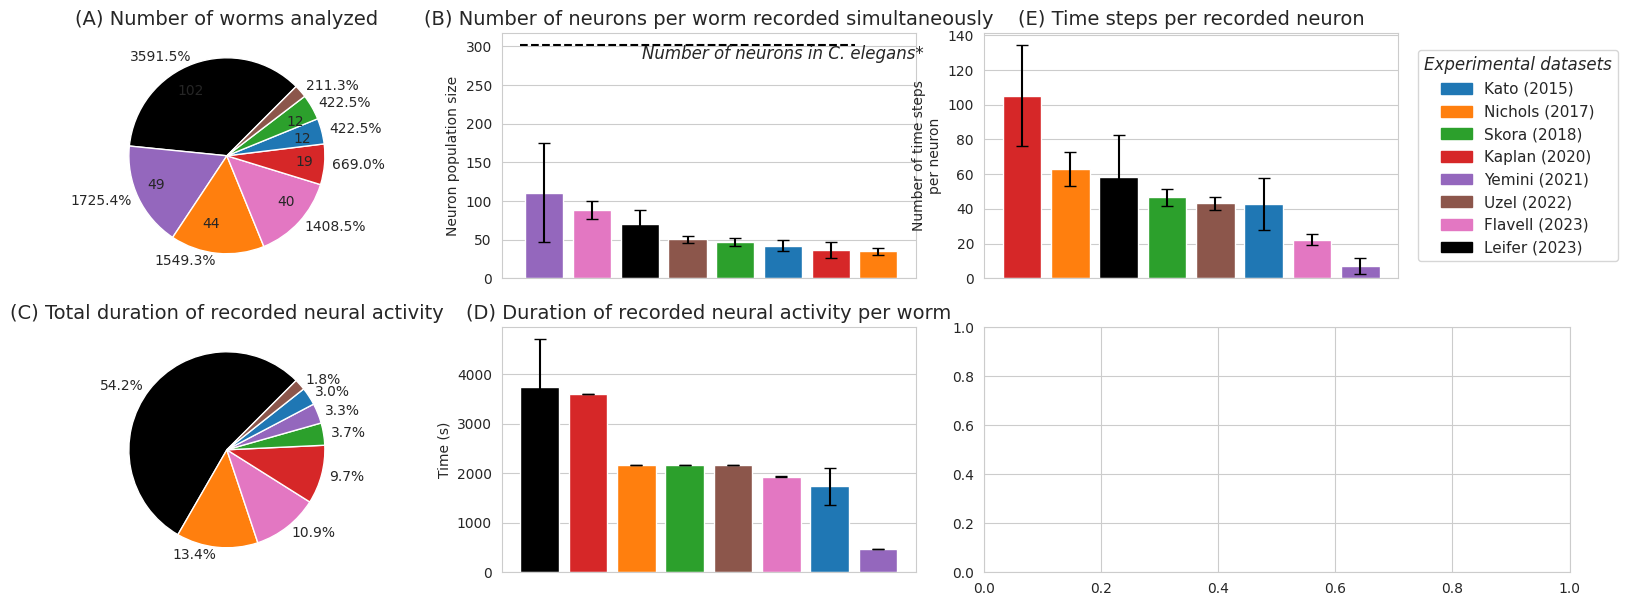

In [4]:
fig1_path_dict = {
    "train_dataset_info": "/om2/user/qsimeon/worm-graph/data/custom_train/train_dataset_info.csv",  # Path to train dataset info => extract number of train time steps
    "val_dataset_info": "/om2/user/qsimeon/worm-graph/data/custom_validation/val_dataset_info.csv",  # Path to val. dataset info => extract number of val. time steps
    "combined_dataset_info": "/om2/user/qsimeon/worm-graph/data/custom_combined/combined_dataset_info.csv",  # Path to analysis info => extract total number of worms and time step interval
    # TODO: Quilee has stored the  in the combined_dataset_info.csv and val_dataset_info.csv, use that instead of dt.csv.
}

dataset_info = dataset_information(path_dict=fig1_path_dict, legend_code=leg_code)

# Data scaling

*Data scaling plot. To generate the dataframe with the relevant results, firstly for each model you want to plot, you need to furnish the paths for each trial. Then you can call the plot function to obtain a graphic with mean and standard deviation bars. You need to provide the legend code for color standardization.*

In [11]:
# TODO: Do experiments, for each model architecture, by varying the sizes of subsets of the combined datasets.
# Each subset will have a distribution of timesteps per neuron (i.e. each worm has a timestep per neuron metric).
# For each subset, repeat the train pipeline n times (here you did n=3) and save the validation loss each time.
nts_experiments = {
    "LSTM": [
        os.path.join("results", "NTS_LSTM"),  # LSTM trial 1
        os.path.join("results", "NTS_LSTM_1"),  # LSTM trial 2
        os.path.join("results", "NTS_LSTM_2"),  # LSTM trial 3
    ],
    "Transformer": [
        os.path.join("results", "NTS_TRANSFORMER"),  # Transformer trial 1
        os.path.join("results", "NTS_TRANSFORMER_1"),  # Transformer trial 2
        os.path.join("results", "NTS_TRANSFORMER_2"),  # Transformer trial 3
    ],
    "Linear": [
        os.path.join("results", "NTS_LINEAR"),  # Linear trial 1
        os.path.join("results", "NTS_LINEAR_1"),  # Linear trial 2
        os.path.join("results", "NTS_LINEAR_2"),  # Linear trial 3
    ],
}

data_results = data_scaling_df(
    nts_experiments
)  # Retrieve the relevant results for the data scaling (and hidden scaling) plot
data_results.head(2)  # Took ~1s in my computer (small experiments)

,expID,model,model_hidden_size,model_hidden_volume,num_time_steps,time_steps_volume,min_val_loss,val_baseline
0,exp0,NetworkLSTM,256,0.000375,9596,239.847893,0.471895,0.02505
1,exp1,NetworkLSTM,256,0.000375,26322,628.292748,0.236112,0.02505


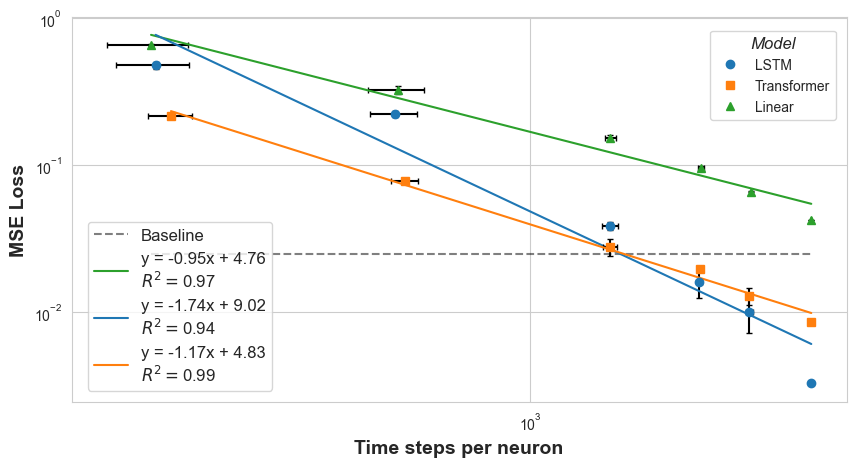

In [12]:
data_scaling_plot(data_results, legend_code=leg_code)

# Hidden Scaling

*Hidden dimension scaling plot. To generate the dataframe with the relevant results, firstly for each model you want to plot, you need to furnish the paths for each trial (it can take some minutes). Then you can call the plot function to obtain a graphic with mean and standard deviation bars. You can chose the degree of the polynomial fit used. You need to provide the legend code for color standardization.*

In [13]:
# Instead of plotting against the hidden size, plot against the number of parameters.
# The hidden size is still the variable that we will vary, but it is simply a way to change the number of parameters.

hidden_experiments = {
    "LSTM": [
        os.path.join("results", "HIDDEN_LSTM_1"),  # LSTM trial 1
        os.path.join("results", "HIDDEN_LSTM_2"),  # LSTM trial 2
        os.path.join("results", "HIDDEN_LSTM_3"),  # LSTM trial 3
    ],
    "Transformer": [
        os.path.join("results", "HIDDEN_TRANSFORMER_1"),  # Transformer trial 1
        os.path.join("results", "HIDDEN_TRANSFORMER_2"),  # Transformer trial 2
        os.path.join("results", "HIDDEN_TRANSFORMER_3"),  # Transformer trial 3
    ],
    "Linear": [
        os.path.join("results", "HIDDEN_LINEAR_1"),  # Linear trial 1
        os.path.join("results", "HIDDEN_LINEAR_2"),  # Linear trial 2
        os.path.join("results", "HIDDEN_LINEAR_3"),  # Linear trial 3
    ],
}

hidden_results = data_scaling_df(
    hidden_experiments
)  # Retrieve the relevant results for the hidden scaling (and data scaling) plot
hidden_results.head(2)  # Took ~4min in my computer (big experiments)

,expID,model,model_hidden_size,model_hidden_volume,num_time_steps,time_steps_volume,min_val_loss,val_baseline
0,exp0,NetworkLSTM,16,0.001313,175379,3290.237599,0.409947,0.02505
1,exp1,NetworkLSTM,32,0.001136,175379,3290.237599,0.293372,0.02505


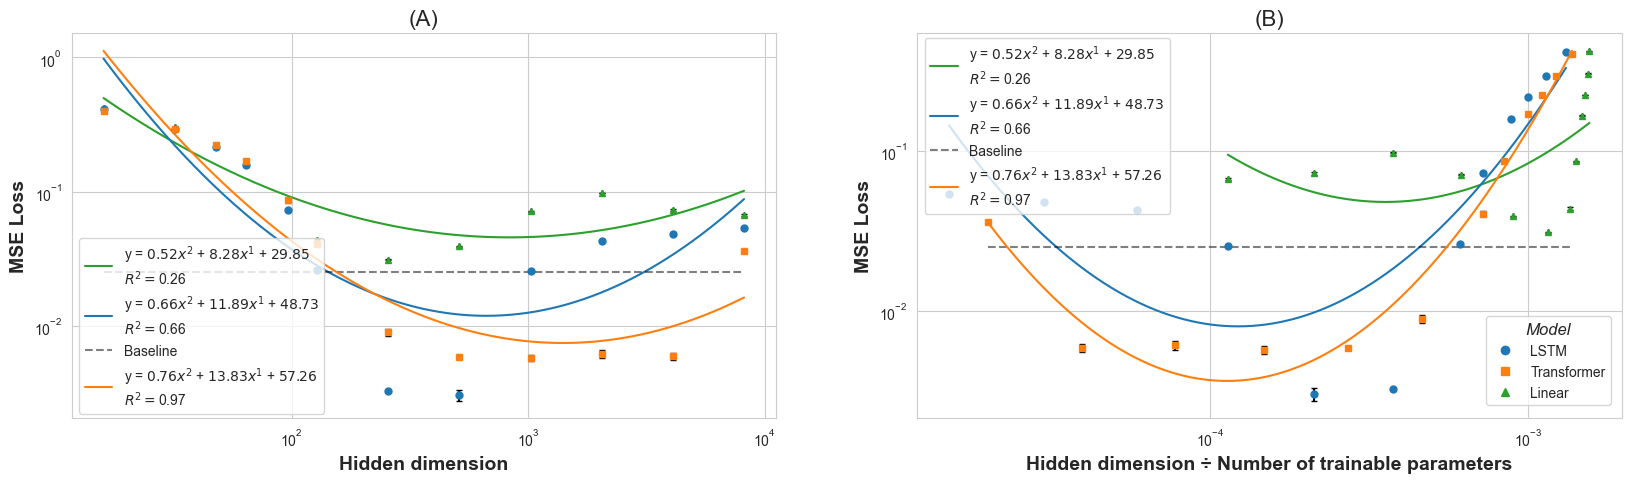

In [14]:
hidden_scaling_plot(hidden_results, legend_code=leg_code, fit_deg=2)

# Data scaling slopes

*Data scaling slopes plot. To generate the dataframe with the relevant results, firstly for each model you want to plot, you need to furnish the paths for each trial (it can take some minutes). Then you can call the plot function to obtain a graphic with mean and standard deviation bars. You need to provide the legend code for color standardization.*

*To create this plot, after a model has been trained (with a given amount of data), we validate it on individual experimental datasets. We then make a plot for each model by experimental dataset.*

In [15]:
nts_experiments = {
    "LSTM": [
        os.path.join("results", "NTS_LSTM"),  # LSTM trial 1
        os.path.join("results", "NTS_LSTM_1"),  # LSTM trial 2
        os.path.join("results", "NTS_LSTM_2"),  # LSTM trial 3
    ],
    "Transformer": [
        os.path.join("results", "NTS_TRANSFORMER"),  # Transformer trial 1
        os.path.join("results", "NTS_TRANSFORMER_1"),  # Transformer trial 2
        os.path.join("results", "NTS_TRANSFORMER_2"),  # Transformer trial 3
    ],
    "Linear": [
        os.path.join("results", "NTS_LINEAR"),  # Linear trial 1
        os.path.join("results", "NTS_LINEAR_1"),  # Linear trial 2
        os.path.join("results", "NTS_LINEAR_2"),  # Linear trial 3
    ],
}

scaling_slope_results = scaling_slopes_df(nts_experiments)  # Took ~10s
scaling_slope_results.head(2)

,expID,model,validation_dataset,individual_validation_loss,individual_baseline_loss,model_hidden_size,model_hidden_volume,num_time_steps,time_steps_volume,min_val_loss,val_baseline
0,exp0,NetworkLSTM,Kato2015,0.305121,0.029884,256,0.000375,9596,239.847893,0.471895,0.02505
1,exp0,NetworkLSTM,Nichols2017,0.237189,0.022199,256,0.000375,9596,239.847893,0.471895,0.02505


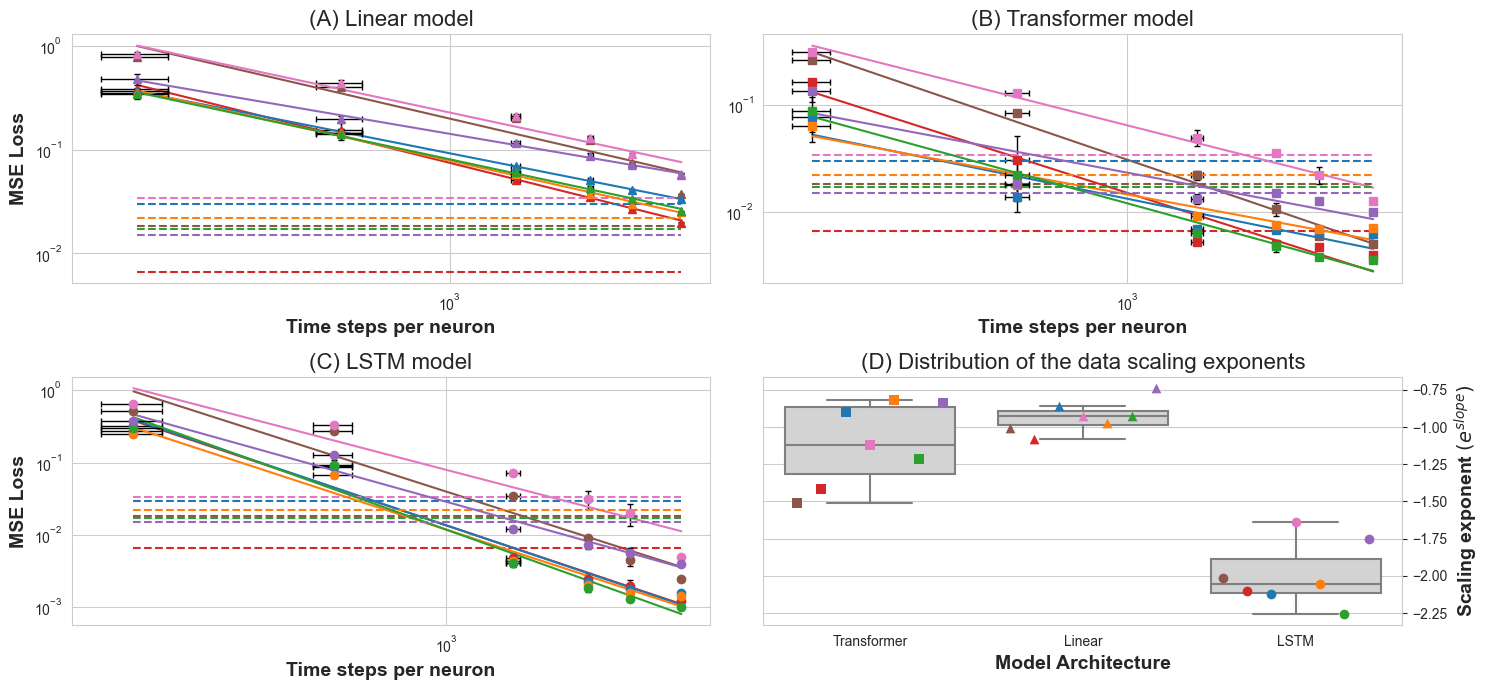

In [16]:
scaling_slopes_plot(scaling_slope_results, legend_code=leg_code)

# Cross-dataset Generalization

*This function automatically loads the results from the indicated experiments and displays a heatmap plot showing the validation loss on individual experimental datasets after a model has been trained (from scratch) using a single experimental dataset.*

*You need to specify the model names respective to each experiment and also the legend color code.*

/home/lrvnc/Projects/worm-graph/analysis/iclr2024/tools.py:678: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1)


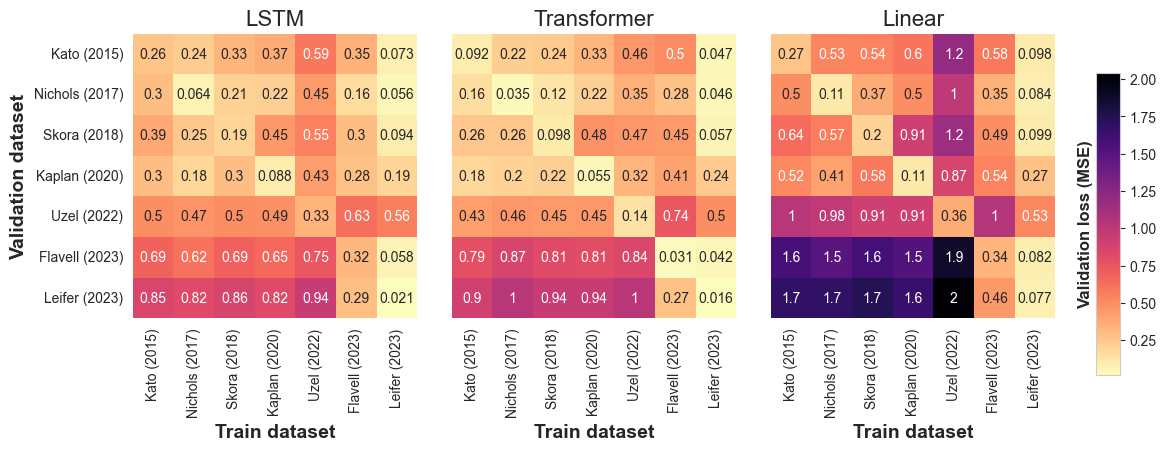

In [17]:
experiment_log_folders = [
    os.path.join("results", "CDS_LSTM"),  # LSTM trial 1
    os.path.join("results", "CDS_TRANSFORMER"),  # Transformer trial 1
    os.path.join("results", "CDS_LINEAR"),  # Linear trial 1
]

model_names = ["LSTM", "Transformer", "Linear"]

cross_dataset(
    experiment_log_folders=experiment_log_folders,
    model_names=model_names,
    legend_code=leg_code,
)

# Predictions

*Load and plot the predictions for the same neuron across different datasets. You need to determine which neurons are common to all datasets (I did it manually).*

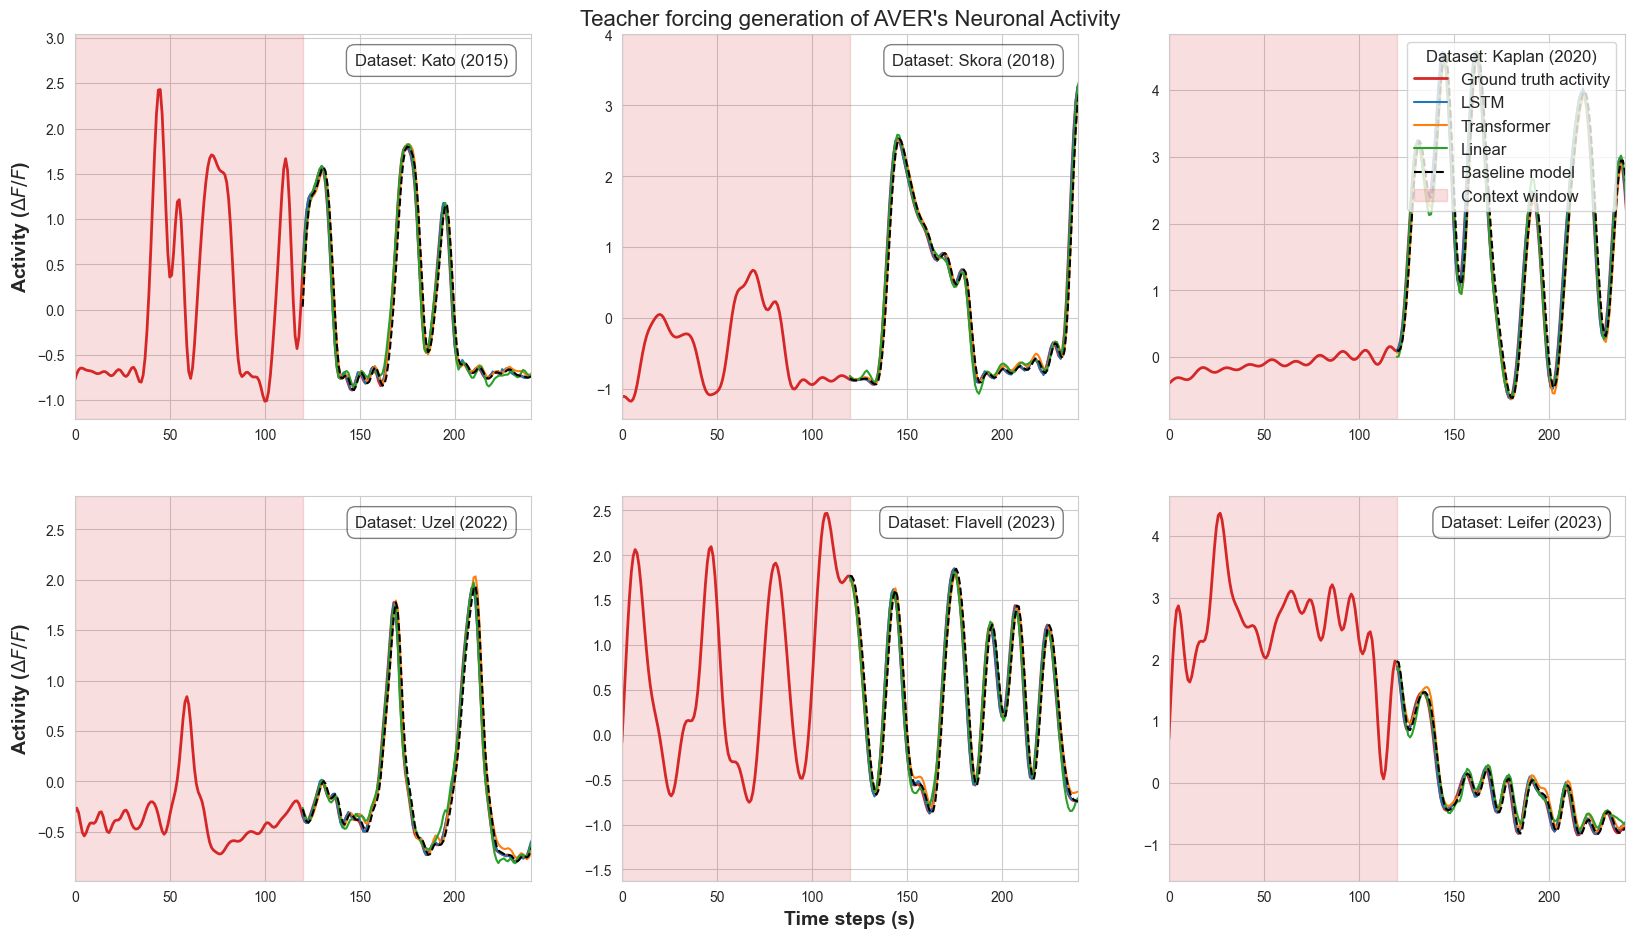

In [18]:
experiment_log_folders = [
    os.path.join("results", "NTS_LSTM_2"),  # LSTM trial 1
    os.path.join("results", "NTS_TRANSFORMER_2"),  # Transformer trial 1
    os.path.join("results", "NTS_LINEAR_2"),  # Linear trial 1
]

model_names = ["LSTM", "Transformer", "Linear"]

ds_type = "val"  # we are plotting the predictions using the validation dataset (data never seen during training, second split)
exp = "exp5"  # model trained with maximum amount of data (best model to use for predictions)
neuron_to_plot = "AVER"  # neuron we want to plot

teacher_forcing(
    experiment_log_folders=experiment_log_folders,
    model_names=model_names,
    legend_code=leg_code,
    ds_type=ds_type,
    exp=exp,
    neuron_to_plot=neuron_to_plot,
)

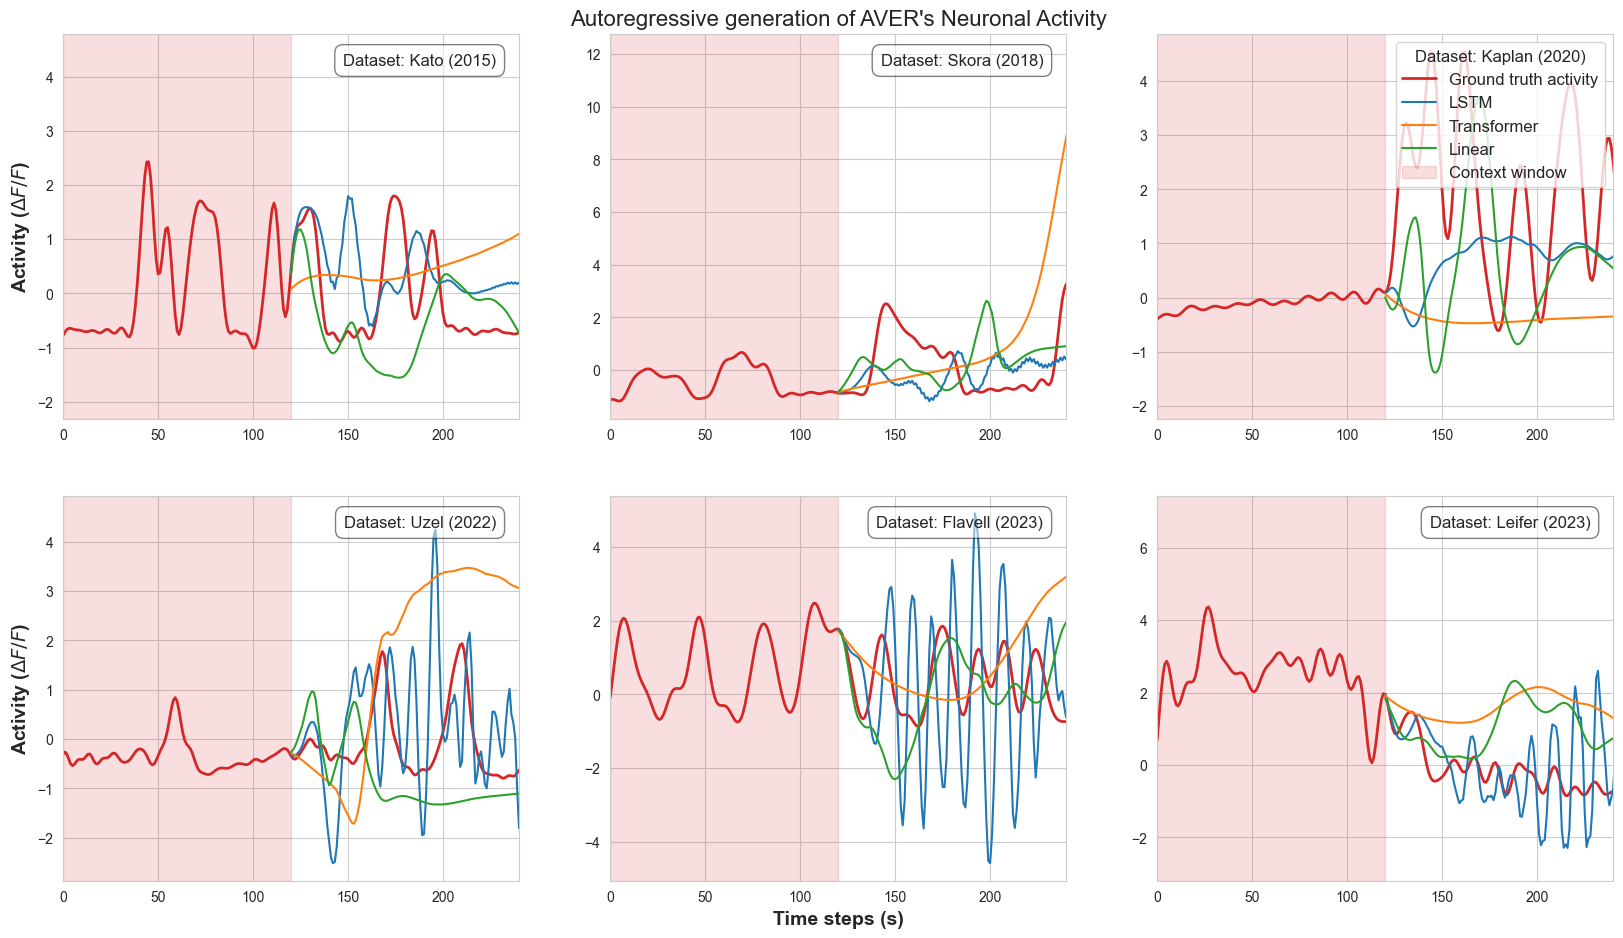

In [19]:
autoregressive(
    experiment_log_folders=experiment_log_folders,
    model_names=model_names,
    legend_code=leg_code,
    ds_type=ds_type,
    exp=exp,
    neuron_to_plot=neuron_to_plot,
)

# (Sup. fig) Prediction gap

*Loads the relevant results and plots the refinement of the prediction plot as the amount of training data for the LSTM model increases.*

/home/lrvnc/Projects/worm-graph/analysis/iclr2024/tools.py:982: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


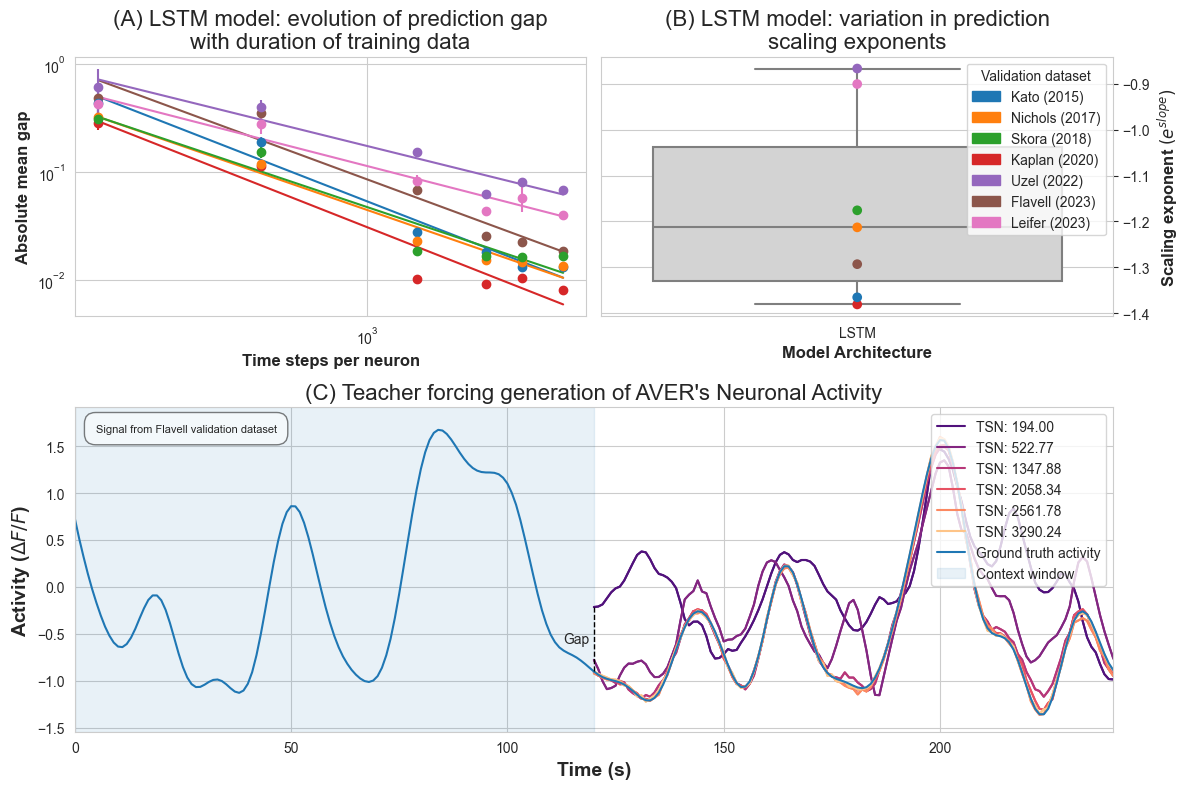

In [20]:
pred_gap_df = prediction_gap(
    exp_nts_log_dir=os.path.join("results", "NTS_LSTM_1"),
    legend_code=leg_code,
    neuronID="AVER",
    wormID="worm1",
    datasetID="Flavell2023",
)